### A MNIST-like fashion product database

### In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

TL;DR

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
tf.__version__

'1.14.0'

### Collect Data

In [0]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [0]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


In [0]:

print(trainX.shape)
print('First example: ', trainX[0:1])



(60000, 28, 28)
First example:  [[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73
     0   0   1   4   0   0   0   0   1   1   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127
    62  54   0   0   0   1   3   4   0   0   3]
  [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176
   134 144 123  23   0   0   0   0  12  10   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207
   178 107 156 161 109  64  23  77 130  72  15]
  [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218
   216 216 163 127 121 122 146 141  88 172  66]
  [  0   0   0  

### Convert both training and testing labels into one-hot vectors.


In [0]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


### Convert both training and testing labels into one-hot vectors.


In [0]:
trainY = tf.keras.utils.to_categorical(trainY,num_classes=10, dtype='float32')

In [0]:
testY = tf.keras.utils.to_categorical(testY,num_classes=10, dtype='float32')

In [0]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
print(testY.shape)
print('First 5 examples now are: ', testY[0:5])

(10000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

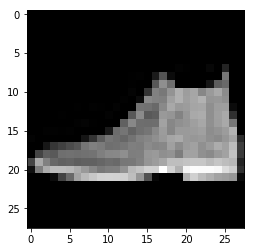

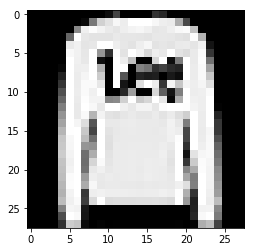

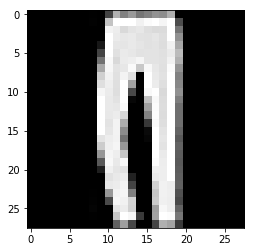

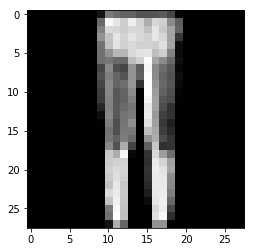

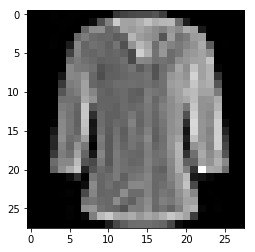

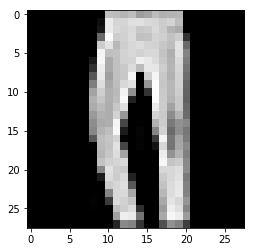

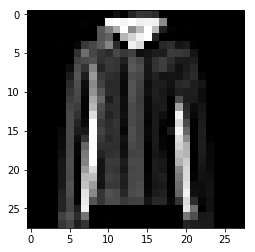

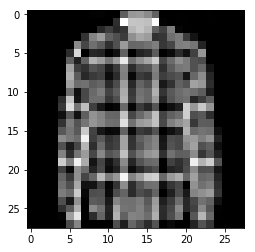

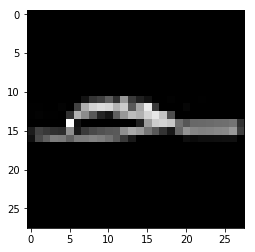

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure()
for i in range(0,9):
  plt.imshow(testX[i],cmap='gray')
  plt.show()
  
testY[0:9]

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes





In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Execute the model 

In [0]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=500)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 12us/sample - loss: 3042.1349 - acc: 0.6340 - val_loss: 1275.8046 - val_acc: 0.7226
Epoch 2/10
60000/60000 [==============================] - 0s 7us/sample - loss: 1511.0823 - acc: 0.7321 - val_loss: 1980.1679 - val_acc: 0.7401
Epoch 3/10
60000/60000 [==============================] - 0s 7us/sample - loss: 1260.5098 - acc: 0.7502 - val_loss: 584.1789 - val_acc: 0.8144
Epoch 4/10
60000/60000 [==============================] - 0s 6us/sample - loss: 1165.9406 - acc: 0.7599 - val_loss: 1383.7639 - val_acc: 0.6946
Epoch 5/10
60000/60000 [==============================] - 0s 7us/sample - loss: 1037.2650 - acc: 0.7683 - val_loss: 543.2369 - val_acc: 0.8145
Epoch 6/10
60000/60000 [==============================] - 0s 7us/sample - loss: 1114.4051 - acc: 0.7707 - val_loss: 651.5982 - val_acc: 0.7692
Epoch 7/10
60000/60000 [==============================] - 0s 8us/sample - loss: 1064.336

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.


In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model


In [0]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=500)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.9969 - acc: 0.6661 - val_loss: 0.7482 - val_acc: 0.7482
Epoch 2/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.6540 - acc: 0.7773 - val_loss: 0.6320 - val_acc: 0.7863
Epoch 3/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.5889 - acc: 0.7999 - val_loss: 0.5925 - val_acc: 0.7988
Epoch 4/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.5572 - acc: 0.8108 - val_loss: 0.5688 - val_acc: 0.8073
Epoch 5/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.5346 - acc: 0.8177 - val_loss: 0.5529 - val_acc: 0.8128
Epoch 6/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.5192 - acc: 0.8230 - val_loss: 0.5408 - val_acc: 0.8177
Epoch 7/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.5086 - acc: 0.8271 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=500)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.4813 - acc: 0.8366 - val_loss: 0.5122 - val_acc: 0.8267
Epoch 2/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.4807 - acc: 0.8379 - val_loss: 0.5117 - val_acc: 0.8266
Epoch 3/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.4790 - acc: 0.8372 - val_loss: 0.5113 - val_acc: 0.8271
Epoch 4/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.4793 - acc: 0.8369 - val_loss: 0.5106 - val_acc: 0.8274
Epoch 5/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.4780 - acc: 0.8379 - val_loss: 0.5102 - val_acc: 0.8272
Epoch 6/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.4779 - acc: 0.8384 - val_loss: 0.5095 - val_acc: 0.8270
Epoch 7/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.4782 - acc: 0.8375 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())


In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 92,856
Trainable params: 91,288
Non-trainable params: 1,568
______________________________________________

### Run the model

In [0]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=500)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/sample - loss: 2.3263 - acc: 0.1196 - val_loss: 2.2807 - val_acc: 0.1877
Epoch 2/10
60000/60000 [==============================] - 1s 20us/sample - loss: 2.2668 - acc: 0.2241 - val_loss: 2.2510 - val_acc: 0.3134
Epoch 3/10
60000/60000 [==============================] - 1s 20us/sample - loss: 2.2360 - acc: 0.3732 - val_loss: 2.2174 - val_acc: 0.4078
Epoch 4/10
60000/60000 [==============================] - 1s 20us/sample - loss: 2.1955 - acc: 0.4054 - val_loss: 2.1702 - val_acc: 0.4292
Epoch 5/10
60000/60000 [==============================] - 1s 20us/sample - loss: 2.1398 - acc: 0.4351 - val_loss: 2.1063 - val_acc: 0.4173
Epoch 6/10
60000/60000 [==============================] - 1s 20us/sample - loss: 2.0670 - acc: 0.4388 - val_loss: 2.0245 - val_acc: 0.4421
Epoch 7/10
60000/60000 [==============================] - 1s 20us/sample - loss: 1.9764 - acc: 0.4604 - val_loss: 1.